<a href="https://colab.research.google.com/github/varun1414/BE_Proj/blob/main/politics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
df1=pd.read_excel('/content/drive/MyDrive/Datasets/Datasets (Varun)/Splitted Datasets/nep_labelled/nep_vedita_1.xlsx')
df2=pd.read_csv('/content/drive/MyDrive/Datasets/Datasets (Varun)/Splitted Datasets/nep_labelled/nep_bhushan.csv')
df3=pd.read_excel('/content/drive/MyDrive/Datasets/Datasets (Varun)/Splitted Datasets/nep_labelled/nep_nisarg.xlsx')
df4=pd.read_csv('/content/drive/MyDrive/Datasets/Datasets (Varun)/Splitted Datasets/nep_labelled/nep_varun_lab.csv')
df5=pd.read_csv('/content/drive/MyDrive/Datasets/Datasets (Varun)/Splitted Datasets/nep_labelled/delhi_lab.csv')
df2=df2[0:300]
df1=df1[0:300]



In [ ]:
df2.Sentiment.unique()

array([   0,    1,   -1, 4682])

In [ ]:
df2.tail()

,Sentiment,Tweet,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
295,1,Addressing the finale of the Smart India Hacka...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,1,"#NEP2020 focuses not only on local art, educat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,1,Thanks to #NEP2020.The Indian higher education...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,1,Welcome #NEP2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,1,#NEP2020 HR team of various recruiting compani...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2=df2[df2['Sentiment']!=4682]

In [ ]:
df1.Sentiment.unique()

array([ 1,  0, -1])

In [ ]:
df3=df3.dropna()

In [ ]:
df5.rename(columns={"tweet":"Tweet"},inplace=True)
df5=df5[["Tweet","Sentiment"]]
df5.reset_index(drop=True,inplace=True)
df5["Sentiment"]=-1
df5

,Tweet,Sentiment
0,Today's WhatsApp group template ..... The Luty...,-1
1,The Indian government has failed to quell the ...,-1
2,It's now obvious that last week's extreme viol...,-1
3,Sowing seeds of hatred in the young minds is a...,-1
4,The Indian government has failed to quell the ...,-1
...,...,...
28688,Hi\nI'm a Graphic Designer ready to help you.\...,-1
28689,#DelhiRiots #DelhiBurning #DelhiIsBurning pic....,-1
28690,#2002Gujarat_Delhi2020\n#DelhiRiots #DelhiBurn...,-1
28691,#DelhiRiots https://twitter.com/TurkeyUrdu/st...,-1


In [ ]:
df=pd.concat([df1[['Tweet','Sentiment']],df2[['Tweet','Sentiment']], df3[['Tweet','Sentiment']],df5[['Tweet','Sentiment']][0:400], df4[['Tweet','Sentiment']][0:400]])


In [ ]:
df=df.dropna()

df
df=df[df['Sentiment']!=0]
df.reset_index(drop=True,inplace=True)

In [ ]:
df.shape

(1457, 2)

In [ ]:
df['Sentiment'].replace({-1:0},inplace=True)




In [ ]:
df

,Tweet,Sentiment
0,Historically #TamilNadu has been a state with ...,1.0
1,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,1.0
2,@PMOIndiaâ€™s anti-democratic #NEP2020 was 400...,0.0
3,With Rafale India has strengthened it's defenc...,1.0
4,as soon as this pandemic will end I'm going ba...,1.0
...,...,...
1452,4. You bring in vocational education which is ...,0.0
1453,2. Giving state wise control again shifting th...,0.0
1454,Dear So called #Hindi Fanatics and #Sanskrit e...,0.0
1455,Then provide with teachers of these subjects i...,0.0


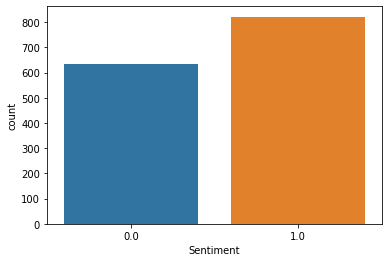

In [ ]:
s=sns.countplot(x="Sentiment",data=df)

In [ ]:
X=df['Tweet']
Y=df['Sentiment']

X

0       Historically #TamilNadu has been a state with ...
1       #HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...
2       @PMOIndiaâ€™s anti-democratic #NEP2020 was 400...
3       With Rafale India has strengthened it's defenc...
4       as soon as this pandemic will end I'm going ba...
                              ...                        
1452    4. You bring in vocational education which is ...
1453    2. Giving state wise control again shifting th...
1454    Dear So called #Hindi Fanatics and #Sanskrit e...
1455    Then provide with teachers of these subjects i...
1456    The NPE 2020 is power pack strategy for making...
Name: Tweet, Length: 1457, dtype: object

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
voc_size=100

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
messages=X.copy()
messages

0       Historically #TamilNadu has been a state with ...
1       #HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...
2       @PMOIndiaâ€™s anti-democratic #NEP2020 was 400...
3       With Rafale India has strengthened it's defenc...
4       as soon as this pandemic will end I'm going ba...
                              ...                        
1452    4. You bring in vocational education which is ...
1453    2. Giving state wise control again shifting th...
1454    Dear So called #Hindi Fanatics and #Sanskrit e...
1455    Then provide with teachers of these subjects i...
1456    The NPE 2020 is power pack strategy for making...
Name: Tweet, Length: 1457, dtype: object

In [ ]:
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    #print(i)
    review = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))',' ',messages[i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[0:100]

['histor tamilnadu state progress socialpolici amp high state privat invest educ without pitfal one best india state involv frame nep alleg surpris',
 'hellostrangerep harrisonford georgefloyd jichangwook dishasalian footballindex happyexolday justiceforsush kimsoohyun kimsoohyun galaxyunpack nitishkumar nep happyexolday groth beauti beauty enjoy feel vasu',
 'pmoindia anti democrat nep pg draft somehow pg revis want whoever cut polici less origin size read everyth ever wrote darshana',
 'rafal india strengthen defenc massiv nep educ realli focu upgrad skill student rather collect degre rafaleinindia nep nationaleducationpolici rajnathsingh drrpnishank',
 'soon pandem end go back grade th kculturelko neweducationpolici nep koreancultur languag',
 'final advert amiti univers love profession univers air print moreov biggest mafia edu medic uni shall also becom non profit fuck awesom afford mani kid nep',
 'nep propel india emerg educ hub real upgrad qualiti human capit help integr indust

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [ ]:


sent_length=100
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)



[[ 0  0  0 ... 42  4 83]
 [ 0  0  0 ... 42 82 48]
 [ 0  0  0 ... 27 70 75]
 ...
 [ 0  0  0 ... 73 42 66]
 [ 0  0  0 ... 85 56 42]
 [ 0  0  0 ... 17 42  5]]


In [ ]:
embedded_docs[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 62, 45, 23, 29, 95, 74, 30,
       23, 88, 79,  2,  2, 49, 25, 45, 28, 23, 84, 56, 42,  4, 83],
      dtype=int32)

In [ ]:
embedding_vector_features=300
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(300))
model.add(Dense(1,activation='sigmoid'))    
# model.add(Dense(3,activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 100, 300)          30000     
_________________________________________________________________
lstm_41 (LSTM)               (None, 300)               721200    
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 301       
Total params: 751,501
Trainable params: 751,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:




len(embedded_docs),Y.shape

Y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
1452    0.0
1453    0.0
1454    0.0
1455    0.0
1456    1.0
Name: Sentiment, Length: 1457, dtype: float64

In [ ]:


import numpy as np

X_final=np.array(embedded_docs)
y_final=np.array(Y)
y_final

array([1., 1., 0., ..., 0., 0., 1.])

In [ ]:
X_final.shape,y_final.shape

((1457, 100), (1457,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)


In [ ]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)



Epoch 1/10
16/16 [==============================] - 2s 40ms/step - loss: 0.6888 - accuracy: 0.5606 - val_loss: 0.6596 - val_accuracy: 0.5676
Epoch 2/10
16/16 [==============================] - 0s 17ms/step - loss: 0.6427 - accuracy: 0.6155 - val_loss: 0.5959 - val_accuracy: 0.6778
Epoch 3/10
16/16 [==============================] - 0s 16ms/step - loss: 0.5711 - accuracy: 0.7279 - val_loss: 0.5104 - val_accuracy: 0.7464
Epoch 4/10
16/16 [==============================] - 0s 14ms/step - loss: 0.4715 - accuracy: 0.7985 - val_loss: 0.5154 - val_accuracy: 0.7588
Epoch 5/10
16/16 [==============================] - 0s 14ms/step - loss: 0.4493 - accuracy: 0.8090 - val_loss: 0.4667 - val_accuracy: 0.7838
Epoch 6/10
16/16 [==============================] - 0s 14ms/step - loss: 0.4152 - accuracy: 0.8030 - val_loss: 0.4620 - val_accuracy: 0.7879
Epoch 7/10
16/16 [==============================] - 0s 14ms/step - loss: 0.4084 - accuracy: 0.8137 - val_loss: 0.4529 - val_accuracy: 0.8108
Epoch 8/10
16

In [ ]:


from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [ ]:


y_pred=model.predict_classes(X_test)
y_pred


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[148,  60],
       [ 30, 243]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8128898128898129

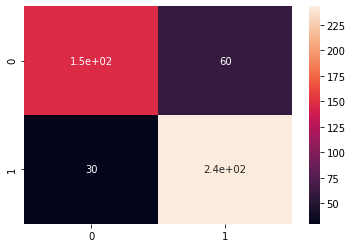

In [ ]:
sns.heatmap(cf_matrix, annot=True)